In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skp
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as clf_r
from sklearn.metrics import accuracy_score

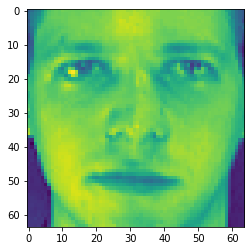

In [2]:
data = np.load('olivetti_faces.npy')
targets = np.load('olivetti_faces_target.npy')
plt.imshow(data[0])

In [3]:
data.shape

(400, 64, 64)

In [4]:
data = data.reshape(data.shape[0], (data.shape[1]*data.shape[2]))
data.shape

(400, 4096)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data, targets)

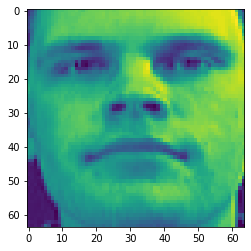

In [6]:
plt.imshow(X_train[0].reshape(64,64))

In [7]:
std_sclr1 = skp.StandardScaler(copy=False).fit(X_train)
std_sclr1.transform(X_train)

array([[-1.1533339 , -0.91193974, -0.60393876, ...,  0.08121256,
        -1.2399888 , -1.2583733 ],
       [ 1.0328319 ,  1.1548818 ,  1.0602355 , ..., -0.76695967,
        -0.57471275, -0.75247246],
       [-0.3194356 , -0.4985754 , -1.670717  , ...,  0.9081804 ,
         0.7558396 ,  0.7212386 ],
       ...,
       [ 0.15385796,  0.6762496 ,  0.8042087 , ..., -0.5125081 ,
        -0.48887068, -0.4665285 ],
       [-1.4012495 , -1.2382799 , -1.5000324 , ...,  0.14482547,
         0.21932653,  0.2813248 ],
       [-0.11659551,  0.34990937,  0.54818165, ..., -0.8305726 ,
        -1.2185284 , -1.2143819 ]], dtype=float32)

In [8]:
std_sclr1 = skp.StandardScaler(copy=False).fit(X_test)
std_sclr1.transform(X_test)

array([[-1.4498237 , -1.5733033 , -1.6363513 , ...,  1.977569  ,
         2.3289173 ,  2.2136176 ],
       [-0.6014066 , -1.1944089 , -1.3392959 , ..., -0.066104  ,
         0.1013281 ,  0.13610375],
       [ 1.3620731 ,  1.3018367 ,  0.9734934 , ..., -1.3276304 ,
        -1.4199522 , -1.3820794 ],
       ...,
       [-1.4740644 , -1.372712  , -1.5939147 , ..., -1.1762472 ,
        -1.0939634 , -1.0890967 ],
       [ 0.2227701 ,  0.27659294,  0.18841806, ..., -0.09133459,
         0.9162998 ,  1.2813997 ],
       [-0.9650139 , -0.949242  , -1.0210222 , ..., -0.39410087,
        -0.30615765, -0.26341808]], dtype=float32)

In [9]:
C_train = np.cov(X_train.T)
C_test = np.cov(X_test.T)

In [10]:
eig_vals, eig_vecs = np.linalg.eig(C_train)

In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [12]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [13]:
def PCA_n_components(eig_values, exp_var_percentage):
    tot = sum(eig_values)
    var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    num_vec_to_keep = 0
    
    for index, percentage in enumerate(cum_var_exp):
        if percentage > exp_var_percentage:
            num_vec_to_keep = index + 1
            break
            
    return num_vec_to_keep

In [14]:
X_train_num_vec_to_keep = PCA_n_components(eig_vals, 92.0)

In [15]:
X_train_num_features = X_train.shape[1]
X_train_proj_mat = eig_pairs[0][1].reshape(X_train_num_features,1)
for eig_vec_idx in range(1, X_train_num_vec_to_keep):
    X_train_proj_mat = np.hstack((X_train_proj_mat, eig_pairs[eig_vec_idx][1].reshape(X_train_num_features,1)))

In [16]:
X_train_PCA = X_train @ (X_train_proj_mat)
X_test_PCA = X_test @ (X_train_proj_mat)

In [17]:
X_train_PCA = np.real(X_train_PCA)
X_test_PCA = np.real(X_test_PCA)

In [18]:
classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(X_train_PCA, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
Y_pred = classifier.predict(X_test_PCA)

In [20]:
print(clf_r(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [21]:
print(accuracy_score(Y_test,Y_pred))

0.98
